# Computational Challenge 7
## Group 4: Thuyen, Zhao, Danial, Youssaf



Group 4 You will implement the Moran model in a scenario in which allele a is frequency dependent, meaning $w_a = 1+(i-1)s/N$ and $ w_A = 1 + is/N$.

(a) Write down the transition probabilities for the Moran model with frequency dependent fitness in this two island setting described for group 3.

(b) Using the parameter values agreed with group 1 for u, v and s, and using N = 10000, repeat the same tasks as set for group 1 (i.e. find the stationary distribution with mutation and fixation probability without mutation) for both models, for values of M = 0 (i.e. only one island) and for M = 50, M = 500 and M = 5000.

(c) Discuss how frequency dependence impacts evolution.

(a) Write down the transition probabilities for the Moran model with frequency dependent fitness in this two island setting described for group 3.
In group3, the population is split between two islands, M individuals are present on island 1 and N-M individuals on islands2. The fitness of alleles a and A are assumed to be the same on both islands, the fitness of an individual is calculated relative to the other members of the island only. 

According to the equation that:
    with Selection and Mutation:
    
$$ p_{i,i+1} = \frac{w_a}{iw_a + (N-i)w_A}((1-\mu_a)\frac{i}{N} + \mu_A(1-\frac{i}{N}))(1-\frac{i}{N}) $$

$$ p_{i,i-1} = \frac{w_A}{iw_a + (N-i)w_A}((1-\mu_A)(1-\frac{i}{N})+\mu_a\frac{i}{N})(\frac{i}{N}) $$


Transition probabilities:

$$ p(n_1+1,n_2)(n_1, n_2) = f1(1-m12)(1-\frac{n_1}{N})\frac{n_1}{N} + f2m21(1-\frac{n_1}{N})\frac{n_2}{N} $$

$$ p(n_1-1,n_2)(n_1, n_2) = f1(1-m12)(1-\frac{n_1}{N})\frac{n_1}{N} + f2m21\frac{n_1}{N}(1-\frac{n_2}{N}) $$

$$ p(n_1,n_2+1)(n_1, n_2) = f2(1-m21)(1-\frac{n_2}{N})\frac{n_2}{N} + f1m12(1-\frac{n_2}{N})\frac{n_1}{N} $$

$$ p(n_1,n_2-1)(n_1, n_2) = f2(1-m21)(1-\frac{n_2}{N})\frac{n_2}{N} + f1m12\frac{n_2}{N}(1-\frac{n_1}{N}) $$

$$ a_1 + A_1 = M $$

$$ a_2 + A_2 = N-M $$

$$ w_{a_i} = 1 + (a_1 -1)s/N, i = 1,2 $$

$$ w_{A_i} = 1 + a_1s/N, i = 1, 2 $$

$$ W_{a_i} = \frac{w_{a_i}a_i}{a_iw_{a_i} + A_iw_{A_i}}, i = 1, 2 $$

$$ W_{A_i} = \frac{w_{A_i}A_i}{a_iw_{a_i} + A_iw_{A_i}}, i = 1, 2 $$

$$ P(n_1+1, n_2) = f[(1-m_{12})W_{a_1}((1- u_a)\frac{a_1}{M}+u_A(1-\frac{a_1}{M}))(1-\frac{a_1}{M})+m_{21}(\frac{a_2}{N-M})(1-\frac{a_1}{M})] $$

$$ P(n_1-1, n_2) = f[(1-m_{12})W_{A_1}((1- u_A)(1-\frac{a_1}{M})+u_a\frac{a_1}{M})(\frac{a_1}{M})+m_{21}(\frac{a_1}{M})(1-\frac{a_2}{N-M})] $$

$$ P(n_1, n_2+1) = f[(1-m_{21})W_{a_2}((1- u_a)\frac{a_2}{N-M}+u_A(\frac{a_1}{M}))(1-\frac{a_2}{N-M})+m_{12}(1-\frac{a_2}{N-M})(\frac{a_1}{M})] $$

$$ P(n_1, n_2-1) = f[(1-m_{21})W_{A_2}((1- u_A)\frac{a_2}{N-M}+u_a(\frac{a_1}{M}))(1-\frac{a_2}{N-M})+m_{12}(\frac{a_2}{N-M})(1-\frac{a_1}{M})] $$


(b) Using the parameter values agreed with group 1 for u, v and s, and using N = 10000, repeat the same tasks as set for group 1 (i.e. find the stationary distribution with mutation and fixation probability without mutation) for both models, for values of M = 0 (i.e. only one island) and for M = 50, M = 500 and M = 5000.

In [98]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
from numba import jit
import numba as nb
events = [
(+1,-1),
(-1,+1)]
events = np.asarray(events)
no_events = np.arange(0,2,1)
#Mv = list[0,50,500,5000]
#M = N-mv[i]
#wa1 = 1+(a1−1)s/M
#wA1 =1+(a1*s/M)
#wa2 = 1+((a2−1)s/(N-M))
#wA2 =1+(a2*s/(N-M))
#mu_a =0.01
#mu_A =0.01
#s =0.01
#P(+1,0) = wa1*a1/(a1*wa1 + A1*wA1)[(1-m12)((1-mu_a)*a1/M+mu_A*(1-a1/M)) (1-a1/M)+m21(a2/(N-M))(1-a1/M)]
#P(-1,0) = wA1*A1/(a1*wa1 + A1*wA1)[(1-m12)((1-mu_a)*a1/M+mu_A*(1-a1/M)) (1-a1/M)+m21(a1/M)(1-a2/(N-M))]
#P(0,+1) = wa2*a2/(a2*wa2 + A2*wA2)[(1-m21)((1-mu_A)*a2/(N-M)+mu_a*(a1/M)) (1-a2/(N-M))+m12(1-a2/(N-M))(a1/M)]
#P(0,-1) = wA2*A2/(a2*wa2 + A2*wA2)[(1-m21)((1-mu_A)*a2/(N-M)+mu_a*(a1/M)) (1-a2/(N-M))+m12(a2/(N-M))(1-a1/M)]
#a1 = v1[(ns, 0)]
#A1 = v1[(ns, 1)]
#a2 = v2[(ns, 0)]
#A2 = v2[(ns, 1)]
def Gillespie(size,maxtime,mu_a,mu_A,s,M,a0_1,a0_2,m12,m21):
    ns = 0
    time = 0
    N = 10000
    t = np.zeros(size)
    w1 = np.zeros((size,2))
    w2 = np.zeros((size,2))
    #allele frequency a,A
    v1 = np.zeros((size, 2))
    v2 = np.zeros((size, 2))
    #v1 = vector of a1 and A1
    v1[(0, 0)] =a0_1
    v1[(0, 1)] =M-a0_1
    #v2 = vector of a2 and A2
    v2[(0, 0)] =a0_2
    v2[(0, 1)] =N-M-a0_2
    while time <= maxtime:
        wa1 = 1+( v1[(ns, 0)]-1)*s/M
        wA1 =1+( v1[(ns, 0)]*s/M)
        w1[ns,0] = wa1
        w1[ns,1] = wA1
        wa2 = 1+((v2[(ns, 0)]-1)*s/(N-M))
        wA2 =1+(v2[(ns, 0)]*s/(N-M))  
        w2[ns,0] = wa2
        w2[ns,1] = wA2
        z1 = (wa1*v1[(ns, 0)]/(v1[(ns, 0)]*wa1 + v1[(ns, 1)]*wA1))
        z2 = (wA1*v1[(ns, 1)]/(v1[(ns, 0)]*wa1 + v1[(ns, 1)]*wA1))
        z3 = (wa2*v2[(ns, 0)]/(v2[(ns, 0)]*wa2 + v2[(ns, 1)]*wA2))
        z4 = (wA2*v2[(ns, 1)]/(v2[(ns, 0)]*wa2 + v2[(ns, 1)]*wA2))
        rates = np.array([((1-m12)*z1*((1-mu_a)*(v1[(ns, 0)]/M)+mu_A*(1-(v1[(ns, 0)]/M)))* (1-(v1[(ns, 0)]/M))+m21*(v2[(ns, 0)]/(N-M))*(1-(v1[(ns, 0)]/M))),
                  ((1-m12)*z2*((mu_a)*(v1[(ns, 0)]/M)+(1-mu_A)*(1-(v1[(ns, 0)]/M)))* ((v1[(ns, 0)]/M))+m21*(v1[(ns, 0)]/M)*(1-(v2[(ns, 0)]/(N-M)))),
                  ((1-m21)*z3*((1-mu_a)*(v2[(ns, 0)]/(N-M))+mu_A*(1-(v2[(ns, 0)]/(N-M))))* (1-(v2[(ns, 0)]/(N-M)))+m12*(1-v2[(ns, 0)]/(N-M))*(v1[(ns, 0)]/M)),
                  ((1-m21)*z4*((mu_a)*(v2[(ns, 0)]/(N-M))+(1-mu_A)*(1- (v2[(ns, 0)]/(N-M))))*((v2[(ns, 0)]/(N-M)))+m12*(v2[(ns, 0)]/(N-M))*(1-(v1[(ns, 0)]/M)))])
        total_rate  =  np.sum(rates)
        
        dt = -math.log(1 - random.uniform(0.0, 1.0)) / total_rate
        choose = np.searchsorted(np.cumsum(rates/total_rate), np.random.rand(1))[0]
        if choose==0 or choose ==1:
            v1[ns+1]= v1[ns]+events[choose]
            v2[ns+1]=v2[ns]
        else:
            if choose == 2:
                v2[ns+1]= v2[ns]+events[0]
                v1[ns+1]=v1[ns]
            if choose == 3:
                v2[ns+1]= v2[ns]+events[1]
                v1[ns+1]=v1[ns]
        time   = time+dt
        t[ns+1]= t[ns]+dt
        ns= ns+1
        
        if ns == size-1:
            break
    return t[0:ns], v1[0:ns],v2[0:ns], w1[0:ns], w2[0:ns]

def Gillespie_m0(size,maxtime,mu_a,mu_A,s,a0_2):
    ns = 0
    time = 0
    N = 10000
    t = np.zeros(size)
    w2 = np.zeros((size,2))
    #allele frequency a,A
    v2 = np.zeros((size, 2))
    #v2 = vector of a2 and A2
    v2[(0, 0)] =a0_2
    v2[(0, 1)] =N-a0_2
    while time <= maxtime:
        wa2 = 1+((v2[(ns, 0)]-1)*s/(N))
        wA2 =1+(v2[(ns, 0)]*s/(N))
        w2[ns,0] = wa2
        w2[ns,1] = wA2
        z3 = (wa2*v2[(ns, 0)]/(v2[(ns, 0)]*wa2 + v2[(ns, 1)]*wA2))
        z4 = (wA2*v2[(ns, 1)]/(v2[(ns, 0)]*wa2 + v2[(ns, 1)]*wA2))
        rates = np.array([
                  z3*((1-mu_a)*(v2[(ns, 0)]/(N))+mu_A*(1-(v2[(ns, 0)]/(N))))* (1-(v2[(ns, 0)]/(N))),
                  z4*((mu_a)*(v2[(ns, 0)]/(N))+(1-mu_A)*(1- (v2[(ns, 0)]/(N))))*((v2[(ns, 0)]/(N)))])
        total_rate  =  np.sum(rates)
        dt = -math.log(1 - random.uniform(0.0, 1.0)) / total_rate
        choose = np.searchsorted(np.cumsum(rates/total_rate), np.random.rand(1))[0]
        v2[ns+1]= v2[ns]+events[choose]
        time   = time+dt
        t[ns+1]= t[ns]+dt
        ns= ns+1
        if ns == size-1:
            break
    return t[0:ns],v2[0:ns],w2[0:ns]

def fixation_probability_moran(N, w_a, w_A):
    return ((w_A/w_a)-1)/(np.power(w_A/w_a,N)-1)

def fixation_probability_wf(N,s):
    return (1-np.exp(-s))/(1-np.exp(-N*s))

In [129]:
u = 0.01
v = 0.01
s = 0.01
M_list = [0, 50, 500, 5000]
m12 = 2
m21 = 2
a0_1 = 10
N = 10000

C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in true_divide


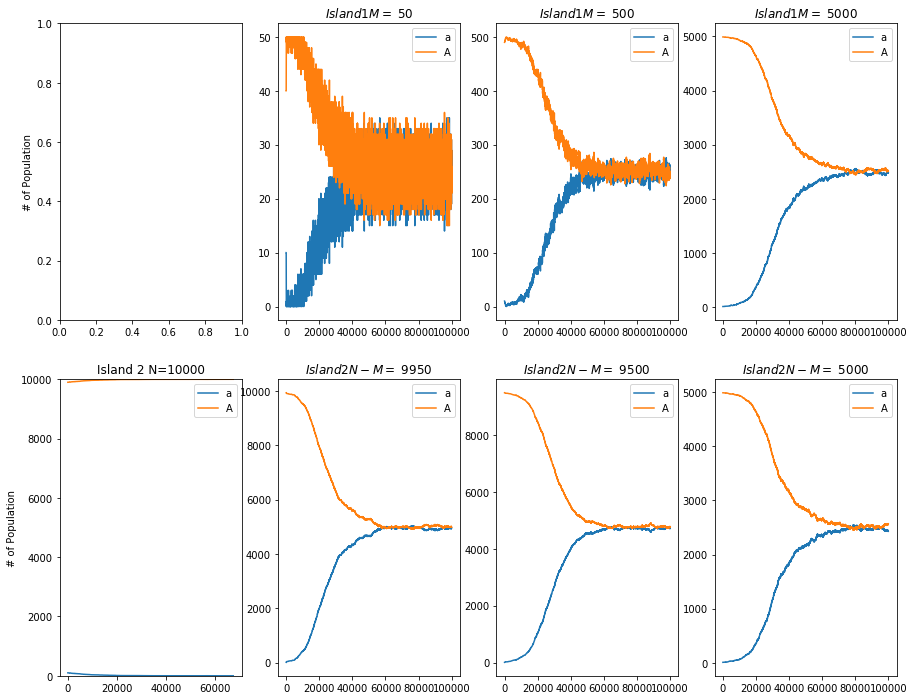

In [132]:
# finde the stationary distribution with mutation
f,axes = plt.subplots(2, len(M_list), figsize = (15,12))
for i in range(len(M_list)):
    M = M_list[i]
    if M == 0:
        maxtime = 500000
        size = 10000000
        a0_2=100
        time, v2, w2_M0 = Gillespie_m0(size,maxtime,u,v,s,a0_2)
        axes[1,i].plot(time,v2[:,[0]], label = 'a')
        axes[1,i].plot(time,v2[:,[1]], label = 'A')
        axes[1,i].set_title('Island 2 N=10000')
        axes[1,i].set_ylim([0,10000])
        axes[1,i].legend(['a','A'])
    else:
        a0_2 = 10
        maxtime = 100000
        size = 1000000
        time, v1, v2, w1, w2 = Gillespie(size,maxtime,u,v,s,M,a0_1,a0_2, m12,m21)
        axes[0,i].plot(time,v1[:,[0]], label = 'a')
        axes[0,i].plot(time,v1[:,[1]], label = 'A')
        axes[0,i].set_title(r'$Island 1 M=$ %d' %(M_list[i]))
        axes[1,i].plot(time,v2[:,[0]], label = 'a')
        axes[1,i].plot(time,v2[:,[1]], label = 'A')
        axes[1,i].set_title(r'$Island 2 N-M=$ %d' %(N - M_list[i]))
        axes[0,i].legend(['a','A'])
        axes[1,i].legend(['a','A'])
    axes[0,0].set_ylabel('# of Population')
    axes[1,0].set_ylabel('# of Population')

In [126]:
u = 0.01
v = 0.01
s = 0.01
M_list = [0, 50, 500, 5000]
m12 = 2
m21 = 2
N = 10000

C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in true_divide


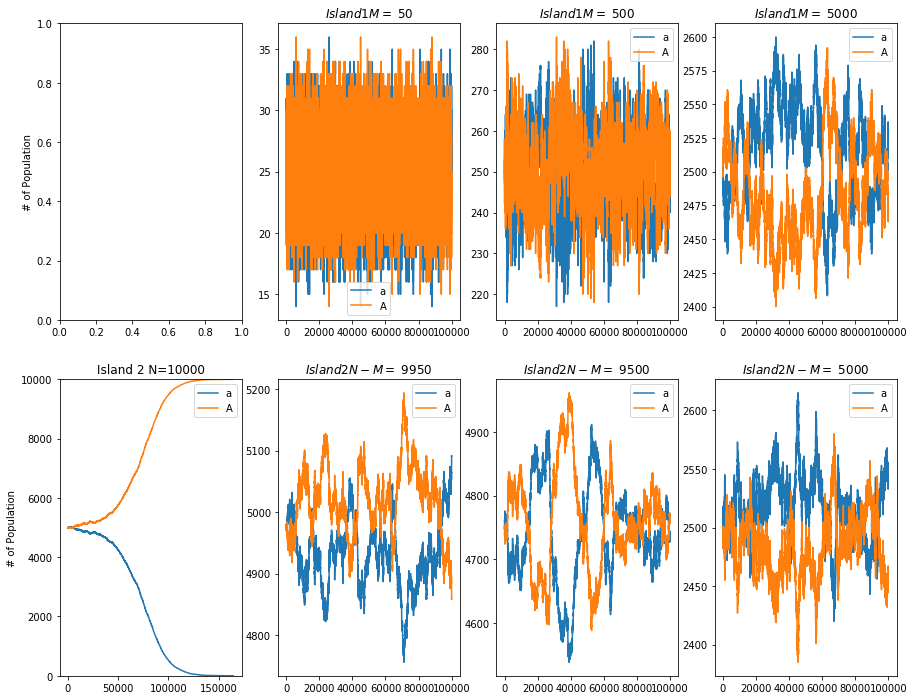

In [127]:
# finde the stationary distribution with mutation
f,axes = plt.subplots(2, len(M_list), figsize = (15,12))
for i in range(len(M_list)):
    M = M_list[i]
    if M == 0:
        maxtime = 500000
        size = 10000000
        a0_2=5000
        time, v2, w2_M0 = Gillespie_m0(size,maxtime,u,v,s,a0_2)
        axes[1,i].plot(time,v2[:,[0]], label = 'a')
        axes[1,i].plot(time,v2[:,[1]], label = 'A')
        axes[1,i].set_title('Island 2 N=10000')
        axes[1,i].set_ylim([0,10000])
        axes[1,i].legend(['a','A'])
    else:
        a0_1 = M/2
        a0_2 = (N-M)/2
        maxtime = 100000
        size = 1000000
        time, v1, v2, w1, w2 = Gillespie(size,maxtime,u,v,s,M,a0_1,a0_2, m12,m21)
        axes[0,i].plot(time,v1[:,[0]], label = 'a')
        axes[0,i].plot(time,v1[:,[1]], label = 'A')
        axes[0,i].set_title(r'$Island 1 M=$ %d' %(M_list[i]))
        axes[1,i].plot(time,v2[:,[0]], label = 'a')
        axes[1,i].plot(time,v2[:,[1]], label = 'A')
        axes[1,i].set_title(r'$Island 2 N-M=$ %d' %(N - M_list[i]))
        axes[0,i].legend(['a','A'])
        axes[1,i].legend(['a','A'])
    axes[0,0].set_ylabel('# of Population')
    axes[1,0].set_ylabel('# of Population')

In [103]:
# fixation probability without mutation

u = 0
v = 0
s = 0.01
M_list = [0, 50, 500, 5000]
N = 10000
m12 = 2
m21 = 2
a0_1 = 1
rep = 500


for m in M_list:
    if m == 0:
        for k in range(0, rep):
            a_count = 0
            maxtime = 500000
            size = 5000000
            time, v2, w2 = Gillespie_m0(size,maxtime,u,v,s,a0_2=5000) 
            if v2[-1,0] == N:
                a_count += 1
        fp_simulate_M0_2 = a_count/rep
        print(r'M = 0, the fixation probability by using simulation is %0.4f' %(fp_simulate_M0_2))
        fp_moran_M0_2 = fixation_probability_moran(N, w2[-1,0], w2[-1,1])
        fp_wf_M0_2 = fixation_probability_wf(N,s)
        print('Moran model')
        print('M = 0')
        print(r'the fixation probability is %0.4f' %(fp_moran_M0_2))
        print('Wright-Fisher model')
        print(r'the fixation probability is %0.4f' %(fp_wf_M0_2))
    else:
        for k in range(0,rep):
            a1_count = 0
            a2_count = 0
            maxtime = 100000
            size = 1000000
            time, v1, v2, w1, w2 = Gillespie(size,maxtime,u,v,s,M,a0_1,a0_2, m12,m21)
            if v1[-1,0] == M:
                a1_count += 1
            if v2[-1,0] == N-M:
                a2_count += 1
        fp_simulate_1 = a1_count/rep
        fp_simulate_2 = a2_count/rep
        print('Using simulation')
        print('M = ', m)
        print(r'the fixation probability in island 1 is %0.4f' %(fp_simulate_1))
        print(r'the fixation probability in island 2 is %0.4f' %(fp_simulate_2))
        fp_moran_1 = fixation_probability_moran(M, w1[-1,0], w1[-1,1])
        fp_moran_2 = fixation_probability_moran(N-M, w2[-1,0], w2[-1,1])
        print('Moran Model')
        print(r'the fixation probability in island 1 is %0.4f' %(fp_moran_1))
        print(r'the fixation probability in island 2 is %0.4f' %(fp_moran_2))
        fp_wf_1 = fixation_probability_wf(M, s)
        fp_wf_2 = fixation_probability_wf(N-M, s)
        print('Wright Fisher Model')
        print(r'the fixation probability in island 1 is %0.4f' %(fp_wf_1))
        print(r'the fixation probability in island 2 is %0.4f' %(fp_wf_2))        


C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in true_divide


M = 0, the fixation probability by using simulation is 0.0100
Moran model
M = 0
the fixation probability is 0.0001
Wright-Fisher model
the fixation probability is 0.0100
Using simulation
M =  50
the fixation probability in island 1 is 0.0000
the fixation probability in island 2 is 0.0000
Moran Model
the fixation probability in island 1 is 0.0002
the fixation probability in island 2 is 0.0002
Wright Fisher Model
the fixation probability in island 1 is 0.0100
the fixation probability in island 2 is 0.0100
Using simulation
M =  500
the fixation probability in island 1 is 0.0000
the fixation probability in island 2 is 0.0000
Moran Model
the fixation probability in island 1 is 0.0002
the fixation probability in island 2 is 0.0002
Wright Fisher Model
the fixation probability in island 1 is 0.0100
the fixation probability in island 2 is 0.0100
Using simulation
M =  5000
the fixation probability in island 1 is 0.0000
the fixation probability in island 2 is 0.0000
Moran Model
the fixation proba

(c) Discuss how frequency dependence impacts evolution.

Text(0.5, 1.0, 'Island 2 N-M = 9500')

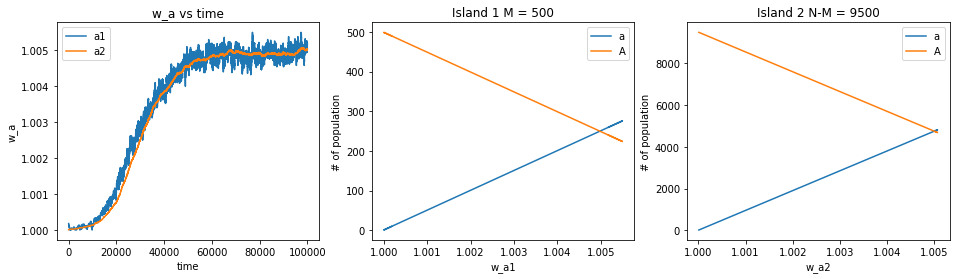

In [124]:
maxtime = 100000
size = 1000000
u = 0.01
v = 0.01
s = 0.01
M = 500
m12 = 2
m21 = 2
a0_1 = 10
a0_2 = 10
    
time, v1, v2, w1, w2 = Gillespie(size,maxtime,u,v,s,M,a0_1,a0_2, m12,m21)

wa1 = w1[:,0]
wa2 = w2[:,0]
plt.figure(figsize = (16,4))
plt.subplot(1,3,1)
plt.plot(time, wa1)
plt.plot(time, wa2)
plt.legend(['a1','a2'])
plt.title('w_a vs time')
plt.xlabel('time')
plt.ylabel('w_a')
plt.subplot(1,3,2)
plt.plot(wa1, v1)
plt.xlabel('w_a1')
plt.ylabel('# of population')
plt.legend(['a','A'])
plt.title('Island 1 M = 500')
plt.subplot(1,3,3)
plt.plot(wa2, v2)
plt.xlabel('w_a2')
plt.ylabel('# of population')
plt.legend(['a','A'])
plt.title('Island 2 N-M = 9500')

Text(0.5, 1.0, 'Island 2 N-M = 9500')

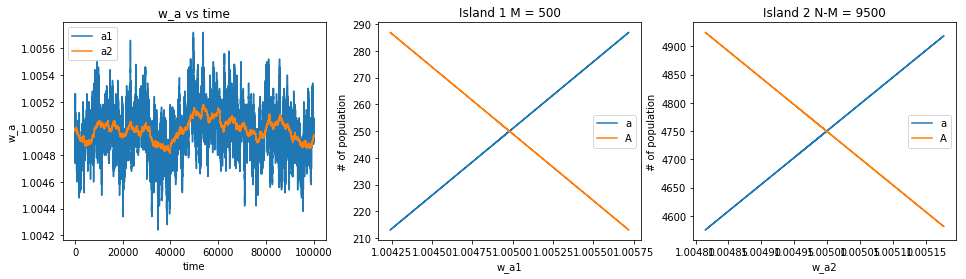

In [125]:
maxtime = 100000
size = 1000000
u = 0.01
v = 0.01
s = 0.01
M = 500
m12 = 2
m21 = 2
a0_1 = 250
a0_2 = 4750
    
time, v1, v2, w1, w2 = Gillespie(size,maxtime,u,v,s,M,a0_1,a0_2, m12,m21)

wa1 = w1[:,0]
wa2 = w2[:,0]
plt.figure(figsize = (16,4))
plt.subplot(1,3,1)
plt.plot(time, wa1)
plt.plot(time, wa2)
plt.legend(['a1','a2'])
plt.title('w_a vs time')
plt.xlabel('time')
plt.ylabel('w_a')
plt.subplot(1,3,2)
plt.plot(wa1, v1)
plt.xlabel('w_a1')
plt.ylabel('# of population')
plt.legend(['a','A'])
plt.title('Island 1 M = 500')
plt.subplot(1,3,3)
plt.plot(wa2, v2)
plt.xlabel('w_a2')
plt.ylabel('# of population')
plt.legend(['a','A'])
plt.title('Island 2 N-M = 9500')